In [2]:
!python3 -m pip install geopandas pandas

In [3]:
import geopandas as gpd
import pandas as pd

In [4]:
leases = gpd.read_file("raw_data/ASLD_-_State_Trust_Parcels/ASLD_-_State_Trust_Parcels.shp")
leases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    23116 non-null  int64   
 1   landnum     23116 non-null  object  
 2   County      23116 non-null  object  
 3   parcel      23116 non-null  int64   
 4   fundtxt     23116 non-null  object  
 5   open_code   23116 non-null  int64   
 6   leased      23116 non-null  object  
 7   ke          23116 non-null  object  
 8   lease_      23116 non-null  int64   
 9   lse_code    23116 non-null  int64   
 10  lse_seq     23116 non-null  int64   
 11  effdate     19929 non-null  object  
 12  expdate     19929 non-null  object  
 13  perpetual   0 non-null      object  
 14  aus         23116 non-null  float64 
 15  rolodex_    23116 non-null  int64   
 16  full_name   19929 non-null  object  
 17  trs         23116 non-null  object  
 18  legal       23103 non-null  object  
 

In [5]:
leases.geometry[1].contains(leases.geometry[0])

False

In [6]:
leases.iloc[0]

OBJECTID                                                  46243
landnum                                 1   10   28 3  1  31005
County                                                   Apache
parcel                                                     1005
fundtxt                          AGRICULTURE & MECHANICAL CLLGE
open_code                                                     0
leased                                                        Y
ke                                                            5
lease_                                                   104398
lse_code                                                      0
lse_seq                                                       0
effdate                                                20180930
expdate                                                20280929
perpetual                                                  None
aus                                                         0.5
rolodex_                                

In [7]:
# Note columns 'SITE_ALTIT_ACCURACY' and SITE_USE_3 have mixed types. If we want to use them we will 
# need to figure out why
wells = pd.read_csv("raw_data/cleaned_well_data.csv")
wells.info()

/tmp/ipykernel_5841/4048727155.py:3: DtypeWarning: Columns (36,45) have mixed types. Specify dtype option on import or set low_memory=False.
  wells = pd.read_csv("raw_data/cleaned_well_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289301 entries, 0 to 289300
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  289301 non-null  int64  
 1   wellid                      289301 non-null  int64  
 2   WLWA_ID                     289301 non-null  int64  
 3   date                        288969 non-null  object 
 4   depth                       275285 non-null  float64
 5   WLWA_WATER_LEVEL_ELEVATION  275285 non-null  float64
 6   WLWA_SOURCE_CODE            283252 non-null  object 
 7   WLWA_METHOD_CODE            272560 non-null  object 
 8   WLWA_REMARK_CODE            24846 non-null   object 
 9   SITE_WELL_ALTITUDE          289301 non-null  float64
 10  SITE_LOCAL_ID               289301 non-null  object 
 11  SITE_LATIT_DEGREE           289301 non-null  int64  
 12  SITE_LATIT_MIN              289301 non-null  int64  
 13  SITE_LATIT_SEC

<Axes: >

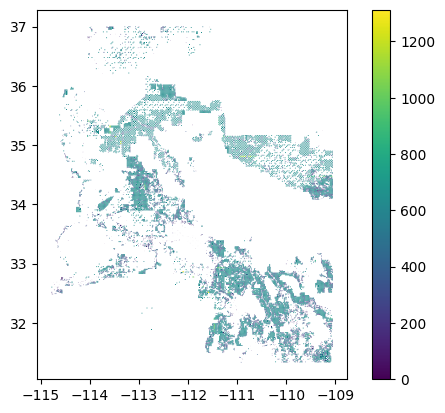

In [8]:
leases.plot("acres", legend = True)

In [9]:
leases.to_csv("our_data/raw_lease_data.csv")

In [10]:
wells['geometry'] = gpd.points_from_xy(
    x=wells.SITE_LONGIT_DECIMAL, 
    y=wells.SITE_LATITUDE_DECIMAL, 
    crs="EPSG:4326"
    )
wells = gpd.GeoDataFrame(data=wells, geometry='geometry')

<Axes: >

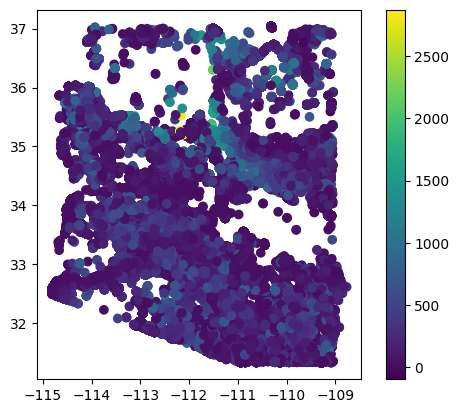

In [11]:
wells.plot("depth", legend=True)